# 支持向量机(Support Vector Machines)
-----------------------------------------

支持向量机（Support Vector Machine，简称SVM）是一种用来解决二分类问题的机器学习算法它通过在样本空间中找到一个划分超平面，将不同类别的样本分开，同时使得两个点集到此平面的最小距离最大，两个点集中的边缘点到此平面的距离最大。SVM的的学习策略就是间隔最大化，可形式化为一个求解凸二次规划问题。

### 1.1 优化目标

逻辑回归中，代价函数为
$$
\begin{align}
  & \frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\cos {{t}_{1}}({{\theta }^{T}}{{x}^{(i)}})+(1-{{y}^{(i)}})\cos {{t}_{0}}({{\theta }^{T}}{{x}^{(i)}})]} \\ 
 & \cos {{t}_{1}}({{\theta }^{T}}{{x}^{(i)}})=-\log {{h}_{\theta }}({{x}^{(i)}}) \\ 
 & \cos {{t}_{0}}({{\theta }^{T}}{{x}^{(i)}})=-\log (1-{{h}_{\theta }}({{x}^{(i)}})) \\ 
\end{align}
$$

1. 我们要除去$1/m$这一项，$1/m$ 仅是个常量，因此，你知道在这个最小化问题中，无论前面是否有$1/m$ 这一项，最终我所得到的最优值${{\theta }}$都是一样的

2. 我们只是指在使用支持向量机时，一些如下的标准惯例，而不是逻辑回归。因此，对于逻辑回归，在目标函数中，我们有两项：第一个是训练样本的代价，第二个是我们的正则化项，我们不得不去用这一项来平衡。这就相当于我们想要最小化$A$加上正则化参数$\lambda$，然后乘以其他项$B$对吧？这里的$A$表示这里的第一项，同时我用**B**表示第二项，但不包括$\lambda$，我们不是优化这里的$A+\lambda\times B$。我们所做的是通过设置不同正则参数$\lambda$达到优化目的。这样，我们就能够权衡对应的项，是使得训练样本拟合的更好。即最小化$A$。还是保证正则参数足够小，也即是对于**B**项而言，但对于支持向量机，按照惯例，我们将使用一个不同的参数替换这里使用的$\lambda$来权衡这两项。你知道，就是第一项和第二项我们依照惯例使用一个不同的参数称为$C$，同时改为优化目标，$C×A+B$。
   因此，在逻辑回归中，如果给定$\lambda$，一个非常大的值，意味着给予$B$更大的权重。而这里，就对应于将$C$ 设定为非常小的值，那么，相应的将会给$B$比给$A$更大的权重。因此，这只是一种不同的方式来控制这种权衡或者一种不同的方法，即用参数来决定是更关心第一项的优化，还是更关心第二项的优化。当然你也可以把这里的参数$C$ 考虑成$1/\lambda$，同 $1/\lambda$所扮演的角色相同，并且这两个方程或这两个表达式并不相同，因为$C=1/\lambda$，但是也并不全是这样，如果当$C=1/\lambda$时，这两个优化目标应当得到相同的值，相同的最优值 ${{\theta }}$。因此，就用它们来代替。那么，我现在删掉这里的$\lambda$，并且用常数$C$来代替。因此，这就得到了在支持向量机中我们的整个优化目标函数。然后最小化这个目标函数，得到**SVM** 学习到的参数$C$

$$
\underset{\theta }{\mathop{\min }}\,C\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\cos {{t}_{1}}({{\theta }^{T}}{{x}^{(i)}})+(1-{{y}^{(i)}})\cos {{t}_{0}}({{\theta }^{T}}{{x}^{(i)}})]+\frac{1}{2}}\sum\limits_{i=1}^{n}{\theta _{j}^{2}}\\
{{h}_{\theta }}(x)=\left\{ \begin{matrix}
   1  \\
   0  \\
\end{matrix} \right.\begin{matrix}
   \quad\quad{{\theta }^{T}}x\ge 0  \\
   \quad others  \\
\end{matrix}
$$

最后有别于逻辑回归输出的概率。在这里，我们的代价函数，当最小化代价函数，获得参数${{\theta }}$时，支持向量机所做的是它来直接预测$y$的值等于1，还是等于0。因此，这个假设函数会预测1。当$\theta^Tx$大于或者等于0时，或者等于0时，所以学习参数${{\theta }}$就是支持向量机假设函数的形式。那么，这就是支持向量机数学上的定义

### 1.2 大边界的直观理解

![](images/p065.png)

如果 $C$非常大，则最小化代价函数的时候，我们将会很希望找到一个使第一项为0的最优解。因此，让我们尝试在代价项的第一项为0的情形下理解该优化问题。比如我们可以把$C$设置成了非常大的常数，这将给我们一些关于支持向量机模型的直观感受。

$$
\min_\limits{\theta}C\sum_\limits{i=1}^{m}\left[y^{(i)}{\cos}t_{1}\left(\theta^{T}x^{(i)}\right)+\left(1-y^{(i)}\right){\cos}t\left(\theta^{T}x^{(i)}\right)\right]+\frac{1}{2}\sum_\limits{i=1}^{n}\theta^{2}_{j}
$$
我们已经看到输入一个训练样本标签为$y=1$，你想令第一项为0，你需要做的是找到一个${{\theta }}$，使得$\theta^Tx>=1$，类似地，对于一个训练样本，标签为$y=0$，为了使${\cos}t_0{(z)}$ 函数的值为0，我们需要$\theta^Tx<=-1$。因此，现在考虑我们的优化问题。选择参数，使得第一项等于0，就会导致下面的优化问题，因为我们将选择参数使第一项为0，因此这个函数的第一项为0，因此是$C$乘以0加上二分之一乘以第二项。这里第一项是$C$乘以0，因此可以将其删去，因为我知道它是0。

这将遵从以下的约束：$\theta^Tx^{(i)}>=1$，如果 $y^{(i)}$是等于1 的，$\theta^Tx^{(i)}<=-1$，如果样本$i$是一个负样本，这样当你求解这个优化问题的时候，当你最小化这个关于变量${{\theta }}$的函数的时候，可以得到一个决策边界

![](images/p066.png)

比如，这就是一个决策边界可以把正样本和负样本分开

或者我们可以画一条更差的决策界，这是另一条决策边界，可以将正样本和负样本分开，但仅仅是勉强分开，这些决策边界看起来都不是特别好的选择，支持向量机将会选择这个黑色的决策边界，相较于之前我用粉色或者绿色画的决策界。这条黑色的看起来好得多，黑线看起来是更稳健的决策界。在分离正样本和负样本上它显得的更好。数学上来讲，这是什么意思呢？这条黑线有更大的距离，这个距离叫做间距(**margin**)。

![](images/p067.png)

当画出这两条额外的蓝线，我们看到黑色的决策界和训练样本之间有更大的最短距离。然而粉线和蓝线离训练样本就非常近，在分离样本的时候就会比黑线表现差。因此，这个距离叫做支持向量机的间距，而这是支持向量机具有鲁棒性的原因，因为它努力用一个最大间距来分离样本。因此支持向量机有时被称为**大间距分类器**。

学习算法会受异常点(outlier) 的影响。比如我们加入一个额外的正样本。

![](images/p068.png)

在这里，如果你加了这个样本，为了将样本用最大间距分开，也许我最终会得到一条类似这样的决策界，对么？就是这条粉色的线，仅仅基于一个异常值，仅仅基于一个样本，就将我的决策界从这条黑线变到这条粉线，这实在是不明智的。而如果正则化参数$C$，设置的非常大，这事实上正是支持向量机将会做的。它将决策界，从黑线变到了粉线，但是如果$C$ 设置的小一点，**如果你将C设置的不要太大，则你最终会得到这条黑线，**当然数据如果不是线性可分的，如果你在这里有一些正样本或者你在这里有一些负样本，则支持向量机也会将它们恰当分开。因此，大间距分类器的描述，仅仅是从直观上给出了正则化参数$C$非常大的情形，同时，要提醒你$C$的作用类似于$1/\lambda$，$\lambda$是我们之前使用过的正则化参数。这只是$C$非常大的情形，或者等价地 $\lambda$ 非常小的情形。你最终会得到类似粉线这样的决策界，但是实际上应用支持向量机的时候，**当$C$不是非常非常大的时候，它可以忽略掉一些异常点的影响，得到更好的决策界。**甚至当你的数据不是线性可分的时候，支持向量机也可以给出好的结果。

回顾 $C=1/\lambda$，因此：

$C$ 较大时，相当于 $\lambda$ 较小，可能会导致过拟合，高方差。

$C$ 较小时，相当于$\lambda$较大，可能会导致低拟合，高偏差。

我们稍后会介绍支持向量机的偏差和方差，希望在那时候关于如何处理参数的这种平衡会变得更加清晰。我希望，这节课给出了一些关于为什么支持向量机被看做大间距分类器的直观理解。它用最大间距将样本区分开，尽管从技术上讲，这只有当参数$C$是非常大的时候是真的，但是它对于理解支持向量机是有益的。

### 1.3 核函数

回顾我们之前讨论过可以使用高级数的多项式模型来解决无法用直线进行分隔的分类问题：

![](images/p069.png)

为了获得上图所示的判定边界，我们的模型可能是${{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+{{\theta }_{3}}{{x}_{1}}{{x}_{2}}+{{\theta }_{4}}x_{1}^{2}+{{\theta }_{5}}x_{2}^{2}+\cdots $的形式。

我们可以用一系列的新的特征$f$来替换模型中的每一项。例如令：
${{f}_{1}}={{x}_{1}},{{f}_{2}}={{x}_{2}},{{f}_{3}}={{x}_{1}}{{x}_{2}},{{f}_{4}}=x_{1}^{2},{{f}_{5}}=x_{2}^{2}$

...得到$h_θ(x)={{\theta }_{1}}f_1+{{\theta }_{2}}f_2+...+{{\theta }_{n}}f_n$。然而，除了对原有的特征进行组合以外，有没有更好的方法来构造$f_1,f_2,f_3$？我们可以利用核函数来计算出新的特征。

给定一个训练样本$x$，我们利用$x$的各个特征与我们预先选定的**地标**(**landmarks**)$l^{(1)},l^{(2)},l^{(3)}$的近似程度来选取新的特征$f_1,f_2,f_3$。

![](images/p070.png)

例如：${{f}_{1}}=similarity(x,{{l}^{(1)}})=e(-\frac{{{\left\| x-{{l}^{(1)}} \right\|}^{2}}}{2{{\sigma }^{2}}})$

其中：${{\left\| x-{{l}^{(1)}} \right\|}^{2}}=\sum{_{j=1}^{n}}{{({{x}_{j}}-l_{j}^{(1)})}^{2}}$，为实例$x$中所有特征与地标$l^{(1)}$之间的距离的和。上例中的$similarity(x,{{l}^{(1)}})$就是核函数，具体而言，这里是一个**高斯核函数**(**Gaussian Kernel**)。 **注：这个函数与正态分布没什么实际上的关系，只是看上去像而已。**

这些地标的作用是什么？如果一个训练样本$x$与地标$l$之间的距离近似于0，则新特征 $f$近似于$e^{-0}=1$，如果训练样本$x$与地标$l$之间距离较远，则$f$近似于$e^{-(一个较大的数)}=0$。

假设我们的训练样本含有两个特征[$x_{1}$ $x{_2}$]，给定地标$l^{(1)}$与不同的$\sigma$值，见下图：

![](images/p071.jpg)

图中水平面的坐标为 $x_{1}$，$x_{2}$而垂直坐标轴代表$f$。可以看出，只有当$x$与$l^{(1)}$重合时$f$才具有最大值。随着$x$的改变$f$值改变的速率受到$\sigma^2$的控制。

在下图中，当样本处于洋红色的点位置处，因为其离$l^{(1)}$更近，但是离$l^{(2)}$和$l^{(3)}$较远，因此$f_1$接近1，而$f_2$,$f_3$接近0。因此$h_θ(x)=θ_0+θ_1f_1+θ_2f_2+θ_1f_3>0$，因此预测$y=1$。同理可以求出，对于离$l^{(2)}$较近的绿色点，也预测$y=1$，但是对于蓝绿色的点，因为其离三个地标都较远，预测$y=0$

![](images/p072.jpg)

这样，图中红色的封闭曲线所表示的范围，便是我们依据一个单一的训练样本和我们选取的地标所得出的判定边界，在预测时，我们采用的特征不是训练样本本身的特征，而是通过核函数计算出的新特征$f_1,f_2,f_3$

### 1.4 选择地标

我们通常是根据训练集的数量选择地标的数量，即如果训练集中有$m$个样本，则我们选取$m$个地标，并且令:$l^{(1)}=x^{(1)},l^{(2)}=x^{(2)},.....,l^{(m)}=x^{(m)}$。这样做的好处在于：现在我们得到的新特征是建立在原有特征与训练集中所有其他特征之间距离的基础之上的，即：
$$
{{f}^{(i)}}=\left| \begin{matrix}
   f_{0}^{(i)}=1  \\
   f_{1}^{(i)}=sim({{x}^{(i)}},{{l}^{(1)}})  \\
   f_{2}^{(i)}=sim({{x}^{(i)}},{{l}^{(2)}})  \\
   f_{i}^{(i)}=sim({{x}^{(i)}},{{l}^{(i)}})={{e}^{0}}=1  \\
   ...  \\
   f_{m}^{(i)}=sim({{x}^{(i)}},{{l}^{(m)}})  \\
\end{matrix} \right|
$$
下面我们将核函数运用到支持向量机中，修改我们的支持向量机假设为：

• 给定$x$，计算新特征$f$，当$θ^Tf>=0$ 时，预测 $y=1$，否则反之。 

相应地修改代价函数为：$\sum{_{j=1}^{n=m}}\theta _{j}^{2}={{\theta}^{T}}\theta $，

$min C\sum\limits_{i=1}^{m}{[{{y}^{(i)}}cos {{t}_{1}}}( {{\theta }^{T}}{{f}^{(i)}})+(1-{{y}^{(i)}})cos {{t}_{0}}( {{\theta }^{T}}{{f}^{(i)}})]+\frac{1}{2}\sum\limits_{j=1}^{n=m}{\theta _{j}^{2}}$
在具体实施过程中，我们还需要对最后的正则化项进行些微调整，在计算$\sum{_{j=1}^{n=m}}\theta _{j}^{2}={{\theta}^{T}}\theta $时，我们用$θ^TMθ$代替$θ^Tθ$，其中$M$是根据我们选择的核函数而不同的一个矩阵。这样做的原因是为了简化计算。

理论上讲，我们也可以在逻辑回归中使用核函数，但是上面使用 $M$来简化计算的方法不适用与逻辑回归，因此计算将非常耗费时间。

在此，我们不介绍最小化支持向量机的代价函数的方法，你可以使用现有的软件包（如**liblinear**,**libsvm**等）。在使用这些软件包最小化我们的代价函数之前，我们通常需要编写核函数，并且如果我们使用高斯核函数，那么在使用之前进行特征缩放是非常必要的。

另外，支持向量机也可以不使用核函数，不使用核函数又称为**线性核函数**(**linear kernel**)，当我们不采用非常复杂的函数，或者我们的训练集特征非常多而样本非常少的时候，可以采用这种不带核函数的支持向量机。

下面是支持向量机的两个参数$C$和$\sigma$的影响：

$C=1/\lambda$

$C$ 较大时，相当于$\lambda$较小，可能会导致过拟合，高方差；

$C$ 较小时，相当于$\lambda$较大，可能会导致低拟合，高偏差；

$\sigma$较大时，可能会导致低方差，高偏差；

$\sigma$较小时，可能会导致低偏差，高方差。

如果你看了本周的编程作业，你就能亲自实现这些想法，并亲眼看到这些效果。这就是利用核函数的支持向量机算法，希望这些关于偏差和方差的讨论，能给你一些对于算法结果预期的直观印象。

### 1.5 选择支持向量机

$n$为特征数，$m$为训练样本数。

(1)如果相较于$m$而言，$n$要大许多，即训练集数据量不够支持我们训练一个复杂的非线性模型，我们选用逻辑回归模型或者不带核函数的支持向量机。

(2)如果$n$较小，而且$m$大小中等，例如$n$在 1-1000 之间，而$m$在10-10000之间，使用高斯核函数的支持向量机。

(3)如果$n$较小，而$m$较大，例如$n$在1-1000之间，而$m$大于50000，则使用支持向量机会非常慢，解决方案是创造、增加更多的特征，然后使用逻辑回归或不带核函数的支持向量机。

值得一提的是，神经网络在以上三种情况下都可能会有较好的表现，但是训练神经网络可能非常慢，选择支持向量机的原因主要在于它的代价函数是凸函数，不存在局部最小值。

> 使用支持向量机（SVM）来构建垃圾邮件分类器
> 从一些简单的2D数据集开始使用SVM来查看它们的工作原理。 然后，我们将对一组原始电子邮件进行一些预处理工作，并使用SVM在处理的电子邮件上构建分类器，以确定它们是否为垃圾邮件。
> 以下为第一个数据

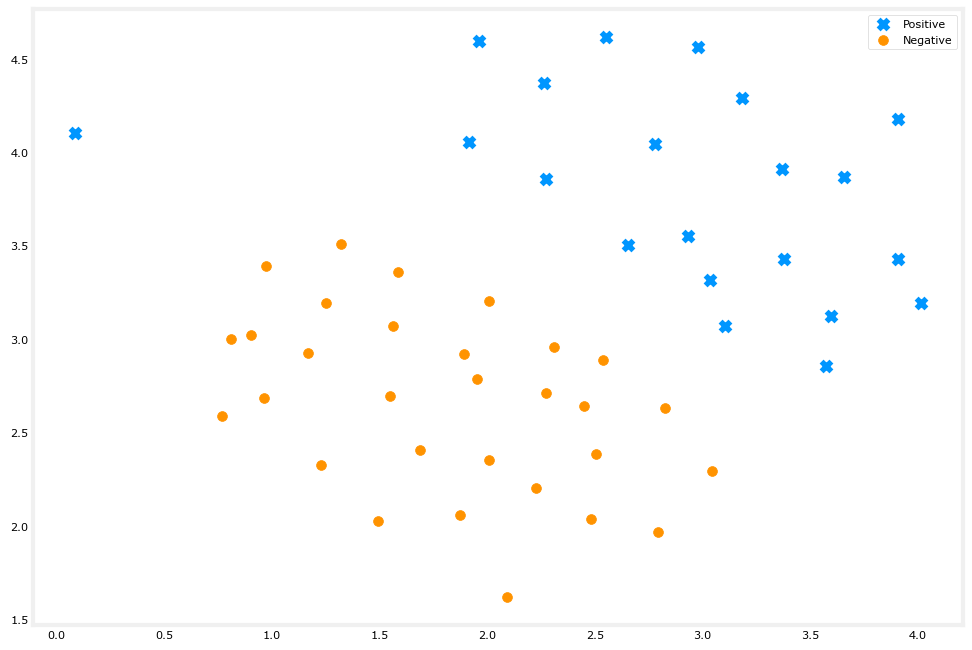

In [125]:
# 读取数据，并且画出散点图（此时，正负为数据自带的标签）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
import warnings
warnings.filterwarnings("ignore")
plt.style.use('data/deeplearning.mplstyle')
raw_data = loadmat('data/ex6data1.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()
plt.show()

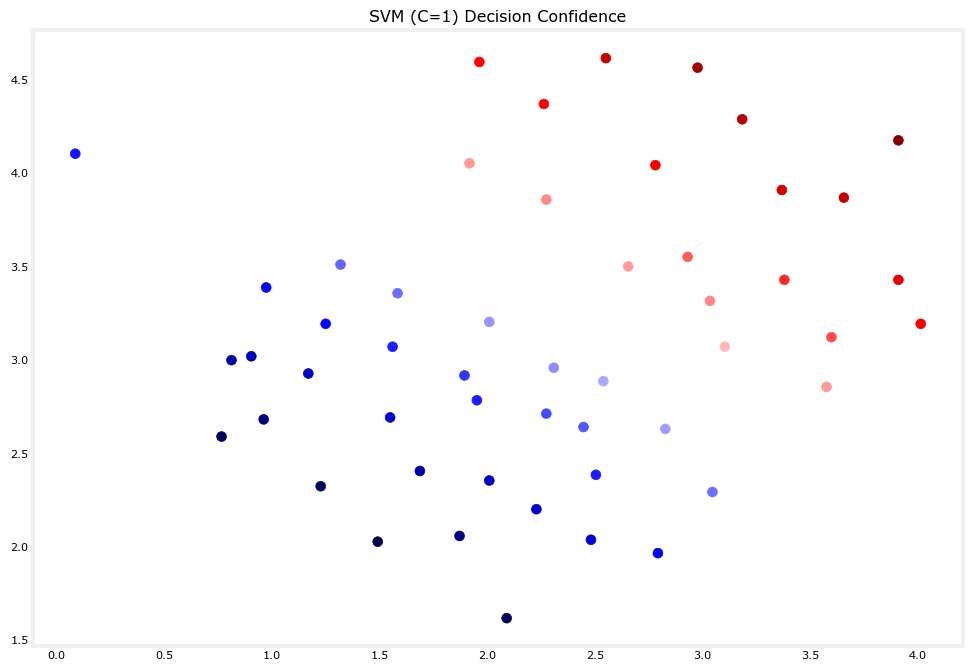

In [126]:
# 使用SVM
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
# C = 1
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

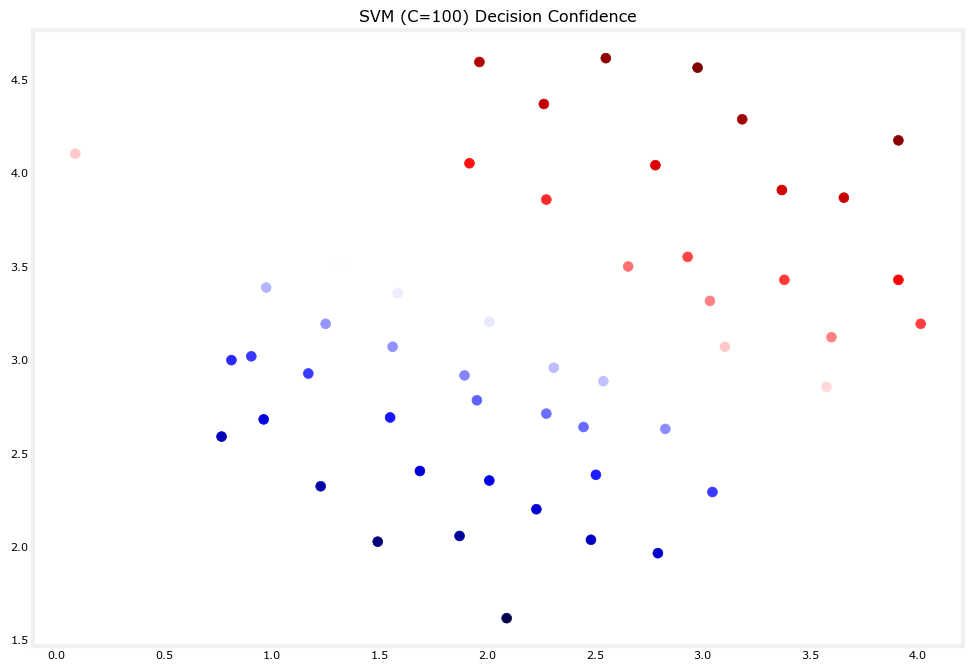

In [127]:
# C = 100
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

> 第二个数据 —— 从线性SVM转移到能够使用内核进行非线性分类的SVM。
> 使用高斯核函数。 虽然scikit-learn具有内置的高斯内核

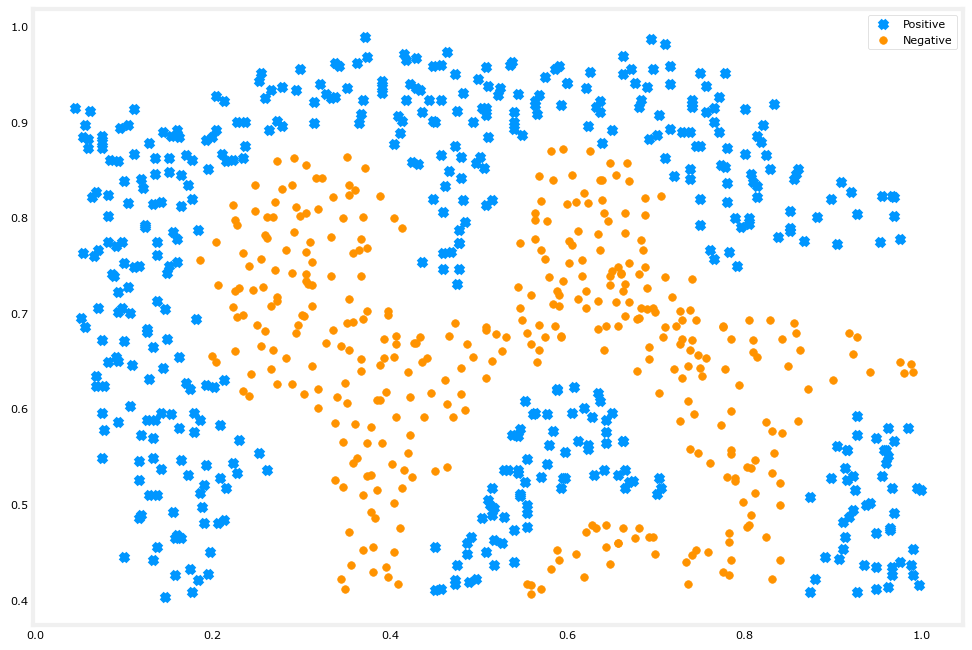

In [128]:
# 高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2
# 绘制原始数据
gaussian_kernel(x1, x2, sigma)
raw_data = loadmat('data/ex6data2.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()
plt.show()

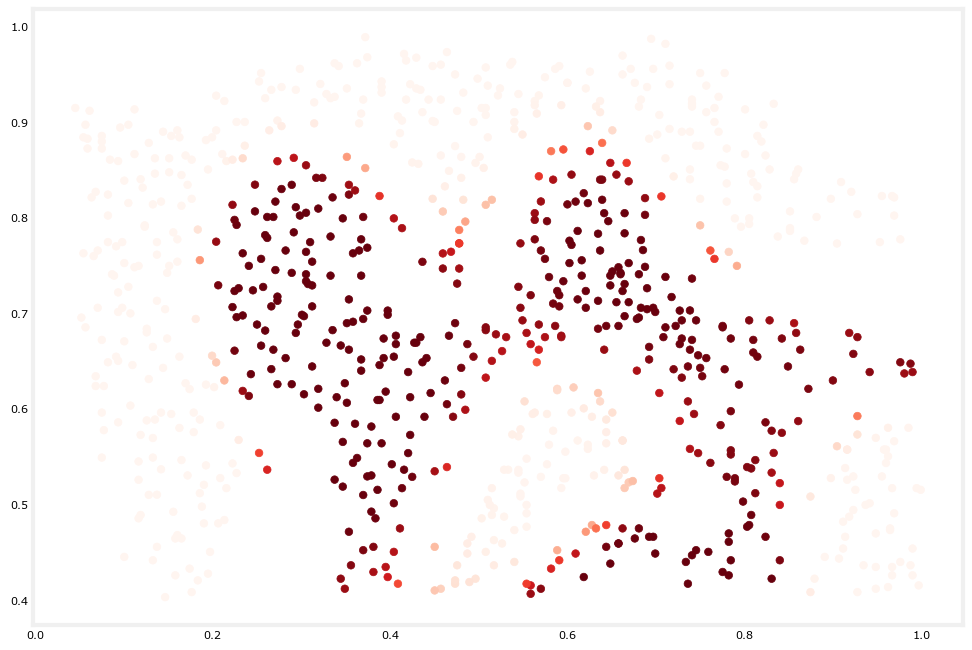

In [129]:
# 采用内置核
svc = svm.SVC(C=100, gamma=10, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')
plt.show()

> 第三个数据集 —— 给出了训练和验证集，并且基于验证集性能为SVM模型找到最优超参数。 
> 虽然我们可以使用scikit-learn的内置网格搜索来做到这一点，但是本着遵循练习的目的，我们将从头开始实现一个简单的网格搜索

In [130]:
# 预处理后的数据， 每个文档已经转换为一个向量，其中1,899个维对应于词汇表中的1,899个单词。 它们的值为二进制，表示文档中是否存在单词
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))


Training accuracy = 99.32%
Test accuracy = 98.7%
